In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
from PorousMediaLab import PorousMediaLab
import numpy as np
%matplotlib inline

In [2]:
tend = 7*24 ## hours
dt = 1
dx = 0.2 ## cm
L = 40 ## cm
x = np.linspace(0, L, L / dx + 1)
t = np.linspace(0, tend, round(tend / dt) + 1)
phi = ( 0.98 - 0.7 ) * np.exp( -x / 20 ) + 0.7
Vhs = 0.37 * 1000 # cm^3
Ahs = 44.17864669 # cm^2
Chs = np.zeros(t.shape) #
Fx = np.zeros(t.shape) 

C_init = 0.4

In [3]:
ftc = PorousMediaLab(L, dx, tend, dt, phi)

In [4]:
ftc.add_species(is_solute=True, element='SF6', D=1e-5*60*60, init_C=C_init, bc_top=0., bc_top_type='dirichlet', bc_bot=0, bc_bot_type='flux')

In [5]:
for i in range(1, len(ftc.time)):
    ftc.SF6.bc_top = Chs[i-1]
    ftc.integrate_one_timestep(i)
    Fx[i] = ftc.estimate_flux_at_top('SF6', i)
    Chs[i] = Chs[i-1] +  Fx[i] * Ahs / Vhs * dt

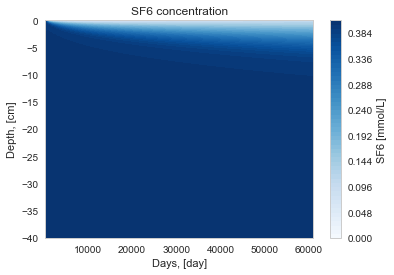

In [6]:
ftc.plot_contourplots(labels=False)

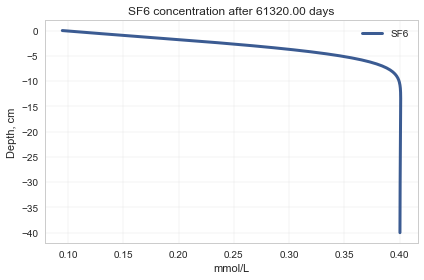

In [7]:
ftc.plot_profiles()

$${\displaystyle H^{cc}=c_{\text{a}}/c_{\text{g}}}$$

In [8]:
Hcc = 0.0056685

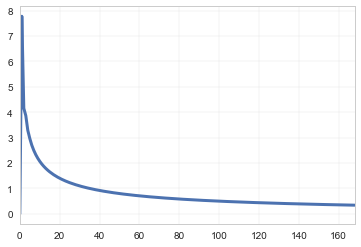

In [9]:
ftc.custom_plot(ftc.time, Fx/Hcc)

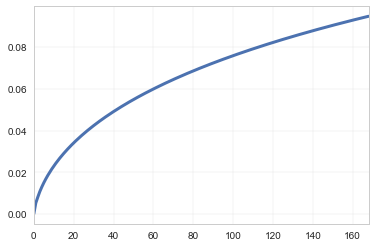

In [10]:
ftc.custom_plot(ftc.time, Chs)

In [11]:
F = ftc.estimate_flux_at_top('SF6')

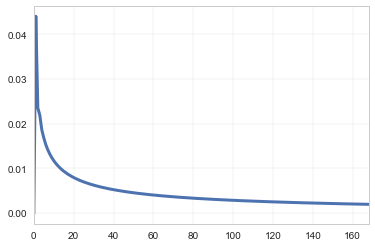

In [12]:
ftc.custom_plot(ftc.time, F)